# Figure 2
- Py Kernel with rpy2 integration for R and Python

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, '/Users/brinkley97/Documents/development/')
import utils

# Load Data

In [2]:
path_to_data =  "lab-kcad/datasets/tiles_dataset/" 
work_data = "figure_2/physical/diurnal_work_lm_6.csv.gz"
off_data = "figure_2/physical/diurnal_off_lm_6.csv.gz"

In [3]:
work_df = utils.load_gzip_csv_data(path_to_data, work_data)
off_df = utils.load_gzip_csv_data(path_to_data, off_data)

# Modify Dataframes

In [4]:
def modify_df(work_df, off_df):
    '''Modify Dataframes columns and values to match/flow with specific questions
    
    Arguments:
    work_df -- Dataframe
    off_df -- Dataframe
    
    Return: combined -- Dataframe
    '''

    day_map = {'4th': "11:00–15:00 h", '5th': "15:00–19:00 h", '6th': "19:00–23:00 h", '1st': "23:00–3:00 h", '2nd': "3:00–7:00 h", '3rd': "7:00–11:00 h"}
    night_map = {'1st': '23:00–3:00 h', '2nd': '3:00–7:00 h', '3rd': '7:00–11:00 h', '4th': '11:00–15:00 h', '5th': '15:00–19:00 h', '6th': '19:00–23:00 h'}
    
    
    work_df_copy = work_df.copy()
    work_df_copy = work_df_copy.drop(columns=["id", "age",  "gender"])
    update_work_df = work_df_copy.replace({"time": day_map})
    
    off_df_copy = off_df.copy()
    off_df_copy = off_df_copy.drop(columns=["id", "age",  "gender"])
    update_off_df = off_df_copy.replace({"time": night_map})

    combine_dfs = pd.concat([update_work_df, update_off_df])
    combine_dfs = combine_dfs.reset_index(drop=True)
    return update_work_df, update_off_df, combine_dfs

In [5]:
modified_work_df, modified_off_df, combine_dfs = modify_df(work_df, off_df)

# Load Generated Specific Questions

In [6]:
base = "/Users/brinkley97/Documents/development/lab-kcad/"
path_to_questions = "tiles-day-night/my_code"
name_of_questions = "generateSpecificQuestions.ipynb"
questions = base + path_to_questions + name_of_questions

In [7]:
# %load questions
/Users/brinkley97/Documents/development/lab-kcad/tiles-day-night/my_codegenerateSpecificQuestions.ipynb

In [8]:
%run "generateSpecificQuestions.ipynb"

In [9]:
figure_2_specific_questions = fig_2

In [10]:
def create_plot(work_by_time, off_by_time, word_to_find):
    '''
    '''
    plt_df = pd.concat([work_by_time, off_by_time])
    plt_df = plt_df.reset_index()
    # print(plt_df)
    data = []
    if word_to_find == "rest":
        p = sns.barplot(x="time", y="rest", data=plt_df, hue='shift', palette="seismic")
        print(word_to_find)
        for value in p.containers:
            
            p.bar_label(value, )
            
            print(p.bar_label(value, ))
        plt.show()
        print()
    elif word_to_find == "step_ratio":
        p = sns.barplot(x="time", y="step_ratio", data=plt_df, hue='shift', palette="seismic")
        print(word_to_find)
        for value in p.containers:
            p.bar_label(value, )
            print(p.bar_label(value, ))
        plt.show()
        print()
        
    
    return 

In [14]:
def specific_questions_with_df(specific_question, specific_question_by_words, work_df, off_df, word_to_find):
    '''Calculate the p-value for... 
        - work-time-day-rest
        - work-time-night-rest
        - off-time-day-rest
        - off-time-night-rest
        - work-time-day-step_ratio
        - work-time-night-step_ratio
        - off-time-day-step_ratio
        - off-time-night-step_ratio
        
    Run "code/physical/plot_diurnal_data.py" to check results
    
    Arguments:
    specific_question -- string
    specific_question_by_words -- list
    work_df -- Dataframe
    off_df -- Dataframe
    word_to_find -- string
    
    Return:
    p_val_df -- Dataframe of p_values
    
    '''
    # time_map = {'23:00–3:00 h': '3:00–7:00 h', '7:00–11:00 h', '11:00–15:00 h', '15:00–19:00 h', '19:00–23:00 h'}

    print(specific_question)
    # print(rest_or_step)
    filter_shifts = ["day", "night"]
    filter_times = list(key_words_in_study.values())[7]
    p_val_df = pd.DataFrame(index=filter_times)
    # print(work_df)
    # work_df = work_df.reset_index(drop=True)
    # print(work_df)
    
    group_by_time_work_df = work_df.set_index(["time"])
    # print(group_by_time_work_df)
    
    # off_df = off_df.reset_index(drop=True)
    # print(off_df)
    
    group_by_time_off_df = off_df.set_index(["time"])
    # work = []
    for time_idx in range(len(specific_question_by_words)):
        # print(time_idx)
        time = specific_question_by_words[time_idx]
        if time in filter_times:
            
            '''
            Work DF
            '''
            work_by_time = group_by_time_work_df.loc[time]
            # print("\n", work_by_time, "---")
            
            
                
            work_shift_day = work_by_time.loc[work_by_time["shift"] == "day"]
            # print(time, "\n", "work", "day", shift_day)
                
            work_shift_night = work_by_time.loc[work_by_time["shift"] == "night"]
            # print(time, "\n", "work", "night", shift_night)
                
            
            # meadian_day, mean_day = np.round(np.nanmedian(work_shift_day[word_to_find]) * 100, 6), np.round(np.nanmean(work_shift_day[word_to_find]) * 100, 6)
            # print("work", "day", time, meadian_day, mean_day)
            
            # meadian_night, mean_night = np.round(np.nanmedian(work_shift_day[word_to_find]) * 100, 6), np.round(np.nanmean(work_shift_day[word_to_find]) * 100, 6)
            # print("work", "night", time, meadian_day, mean_night)
            stats_value, work_p = stats.ttest_ind(np.array(work_shift_day[word_to_find]), np.array(work_shift_night[word_to_find]))
            print("work", time, work_p)
            
            df = create_plot(work_shift_night, work_shift_day, word_to_find)
            
            # print("\nDay :", shift_day[word_to_find], "\nNight :", shift_night[word_to_find])
            p_val_df.loc[time, "p-val"] = work_p
            
            '''
            Off DF
            '''
            off_by_time = group_by_time_off_df.loc[time]
            # print("\n", off_by_time, "---")
                
            off_shift_day = off_by_time.loc[off_by_time["shift"] == "day"]
            # print(time, "\n", "off", "day", off_shift_day)
                
            off_shift_night = off_by_time.loc[off_by_time["shift"] == "night"]
            
            # print(time, "\n", "off", "night", off_shift_night)
            stats_value, off_p = stats.ttest_ind(np.array(off_shift_day[word_to_find]), np.array(off_shift_night[word_to_find]))
            print("off", time, off_p) 
            
            df = create_plot(off_shift_night, off_shift_day, word_to_find)    
               
            '''
            Create Plot
            '''
            
            
            # df = create_plot(work_by_time, off_by_time, word_to_find)
            # print(df)
            
            
            
            p_val_df.loc[time, "p-val"] = off_p
            
    print("\n------------------------------------------\n")
    
    return p_val_df

In [15]:
def figure_2(generated_specific_questions, work_df, off_df):
    '''Reproduce Table 2
    
    Arguments:
    generated_specific_questions -- list
    work_df -- Dataframe
    off_df -- Dataframe
    
    
    Return:
    
    '''
    p_values = []
    filter_physiological = ["rest", "step_ratio"]
    for generated_specific_question_idx in range(len(generated_specific_questions)):
        specific_question = generated_specific_questions[generated_specific_question_idx]
        # print(generated_specific_question_idx, "th specific_question : ", specific_question)
        specific_question_by_words = specific_question.split("*")
        # print(specific_question_by_words)
        
#         for work_df_column in work_df_columns:
#             if work_df_column in specific_question.split("*"):
#                 print(work_df_column, True)
        work_df = work_df.reset_index(drop=True)
        # print(work_df)
        
        off_df = off_df.reset_index(drop=True)
        # print(off_df)
        for filter_physiological_idx in range(len(filter_physiological)):
            
            word_to_find = filter_physiological[filter_physiological_idx]
            if word_to_find in specific_question_by_words:
                # print(word_to_find)
                work_df["type"] = word_to_find
                work_df[word_to_find] = np.round(work_df[word_to_find] * 100, 6)
                modified_work_df = work_df.loc[0:, ["work", "time", word_to_find, "shift", "type"]]
                # print(modified_work_df)
                
                off_df["type"] = word_to_find
                off_df[word_to_find] = np.round(off_df[word_to_find] * 100, 6)
                modified_off_df = off_df.loc[0:, ["work", "time", word_to_find, "shift", "type"]]
                # print(modified_off_df)
                
                # print(generated_specific_question_idx, specific_question)
                p_val = specific_questions_with_df(specific_question, specific_question_by_words, modified_work_df, modified_off_df, word_to_find)
                # print(p_val)
                
                # p_val_df.loc[filter_times[i], "p-val"] = p_val
                # i = i + 1
                # p_values.append(p_val)
                # print(p_val)
    return 

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *rest* between the hours of *23:00–3:00 h* ?
work 23:00–3:00 h 0.0015494236241583748
rest
[Text(0, 0, '86.424')]
[Text(0, 0, '93.9845')]


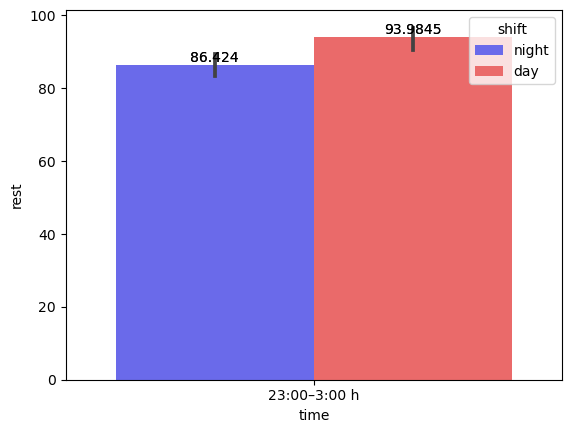


off 23:00–3:00 h 0.8501148599450579
rest
[Text(0, 0, '90.1697')]
[Text(0, 0, '90.7261')]


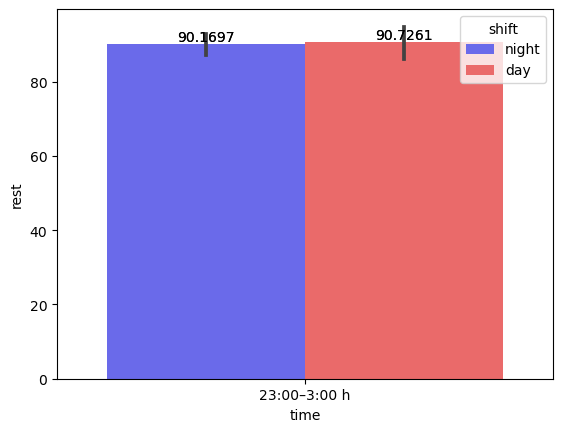



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *rest* between the hours of *3:00–7:00 h* ?
work 3:00–7:00 h 0.0344676531969442
rest
[Text(0, 0, '8746.48')]
[Text(0, 0, '9089.58')]


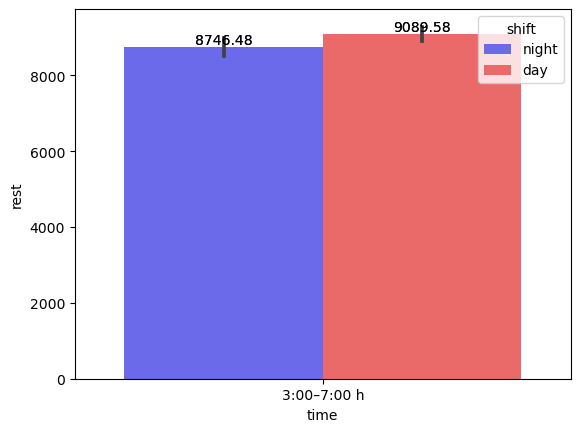


off 3:00–7:00 h 0.3176447078140963
rest
[Text(0, 0, '9417.36')]
[Text(0, 0, '9190.08')]


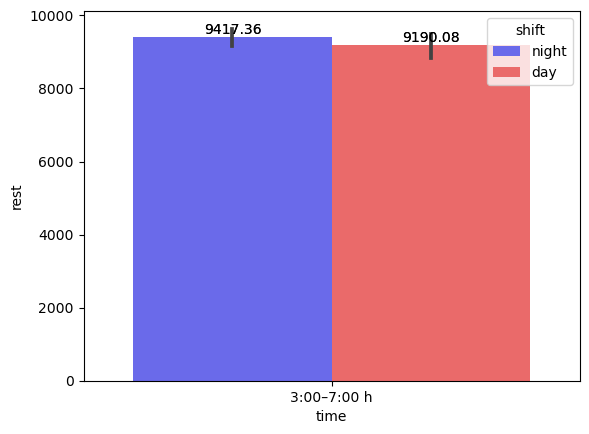



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *rest* between the hours of *7:00–11:00 h* ?
work 7:00–11:00 h 8.61987714996753e-08
rest
[Text(0, 0, '887488')]
[Text(0, 0, '696769')]


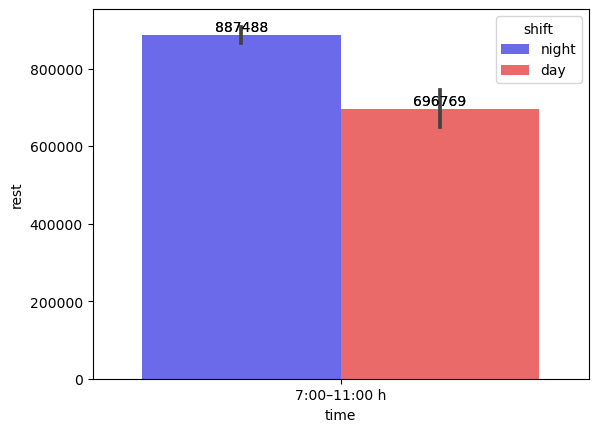


off 7:00–11:00 h 4.2270812980835084e-05
rest
[Text(0, 0, '858704')]
[Text(0, 0, '731615')]


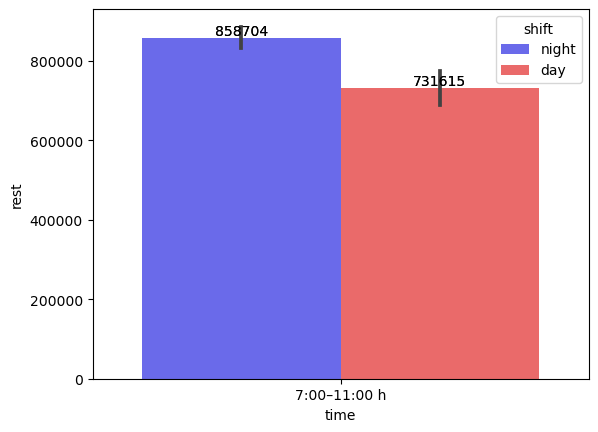



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *rest* between the hours of *11:00–15:00 h* ?
work 11:00–15:00 h 3.460760260901531e-10
rest
[Text(0, 0, '9.2711e+07')]
[Text(0, 0, '6.69559e+07')]


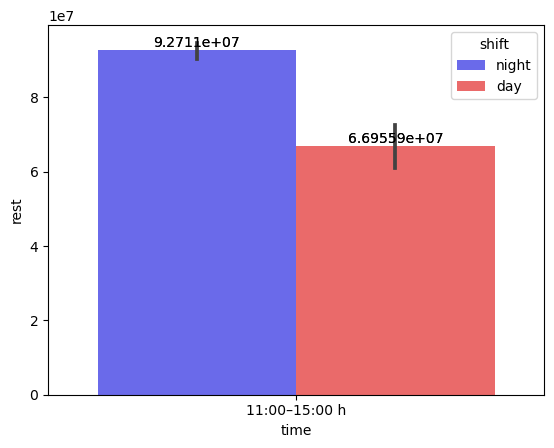


off 11:00–15:00 h 0.0014633834843444883
rest
[Text(0, 0, '7.80197e+07')]
[Text(0, 0, '6.62602e+07')]


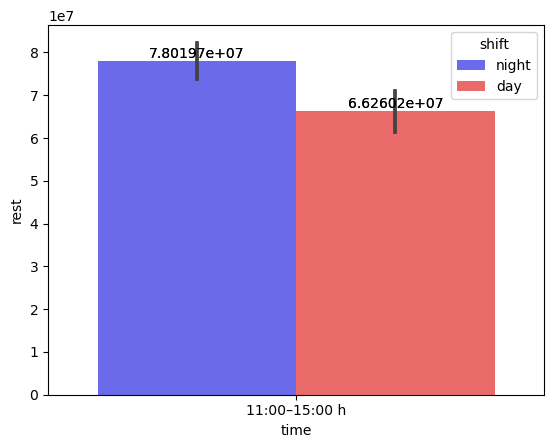



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *rest* between the hours of *15:00–19:00 h* ?
work 15:00–19:00 h 0.0005307693878763338
rest
[Text(0, 0, '8.0506e+09')]
[Text(0, 0, '6.66002e+09')]


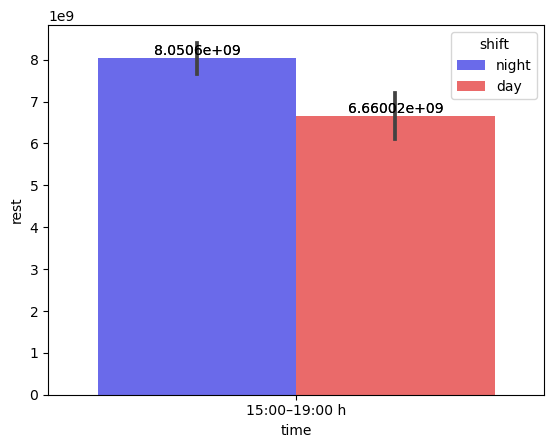


off 15:00–19:00 h 0.006678714989432031
rest
[Text(0, 0, '7.71214e+09')]
[Text(0, 0, '6.65216e+09')]


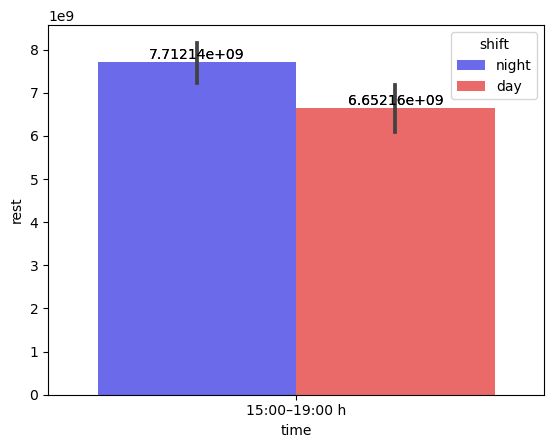



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *rest* between the hours of *19:00–23:00 h* ?
work 19:00–23:00 h 0.8008084356960133
rest
[Text(0, 0, '7.52456e+11')]
[Text(0, 0, '7.61264e+11')]


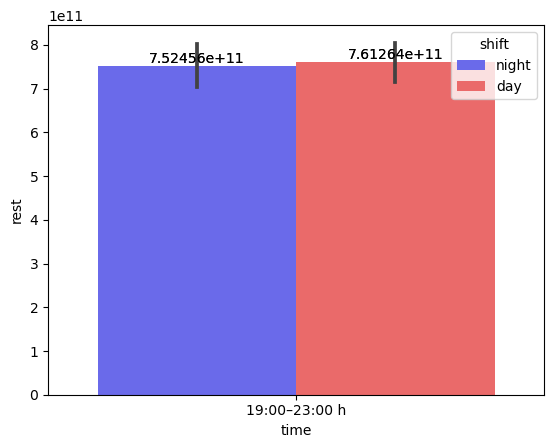


off 19:00–23:00 h 0.14644454482220923
rest
[Text(0, 0, '7.96241e+11')]
[Text(0, 0, '7.43113e+11')]


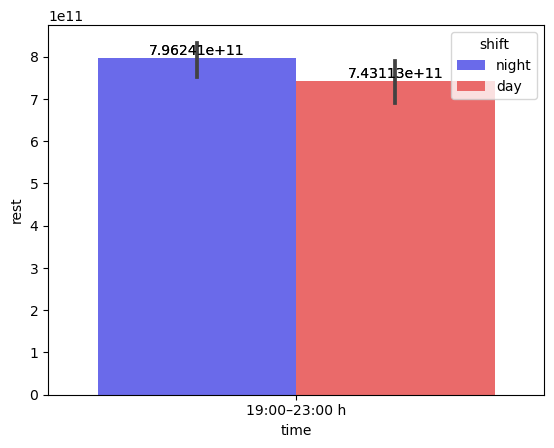



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *step_ratio* between the hours of *23:00–3:00 h* ?
work 23:00–3:00 h 2.146347102360659e-33
step_ratio
[Text(0, 0, '28.9041')]
[Text(0, 0, '4.48904')]


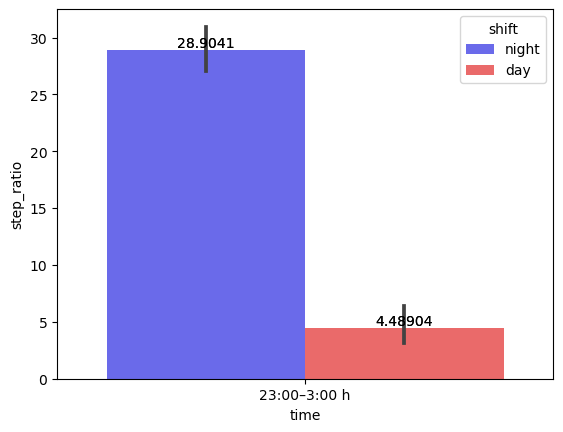


off 23:00–3:00 h 5.30692759381798e-06
step_ratio
[Text(0, 0, '14.601')]
[Text(0, 0, '6.50371')]


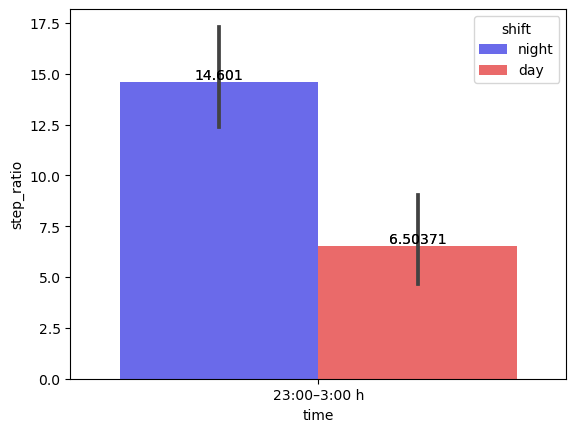



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *step_ratio* between the hours of *3:00–7:00 h* ?
work 3:00–7:00 h 5.311763867112959e-21
step_ratio
[Text(0, 0, '3065.25')]
[Text(0, 0, '1222.61')]


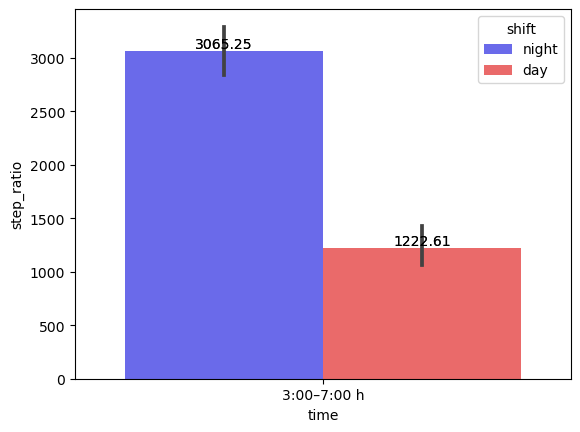


off 3:00–7:00 h 0.14829523667007571
step_ratio
[Text(0, 0, '1085.38')]
[Text(0, 0, '806.195')]


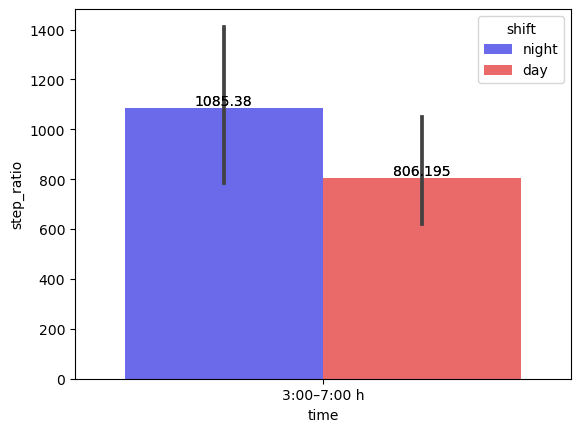



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *step_ratio* between the hours of *7:00–11:00 h* ?
work 7:00–11:00 h 2.329880420577618e-22
step_ratio
[Text(0, 0, '210162')]
[Text(0, 0, '410112')]


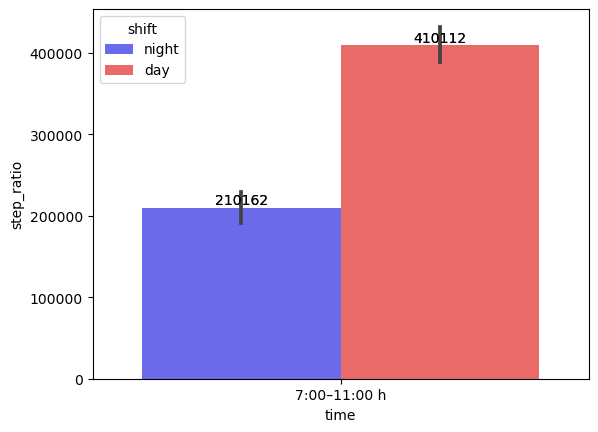


off 7:00–11:00 h 2.6927857742081604e-05
step_ratio
[Text(0, 0, '210624')]
[Text(0, 0, '323146')]


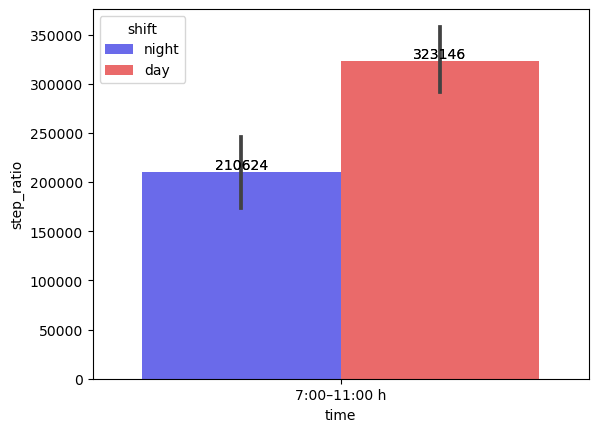



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *step_ratio* between the hours of *11:00–15:00 h* ?
work 11:00–15:00 h 1.36838695061563e-32
step_ratio
[Text(0, 0, '1.11956e+07')]
[Text(0, 0, '4.02993e+07')]


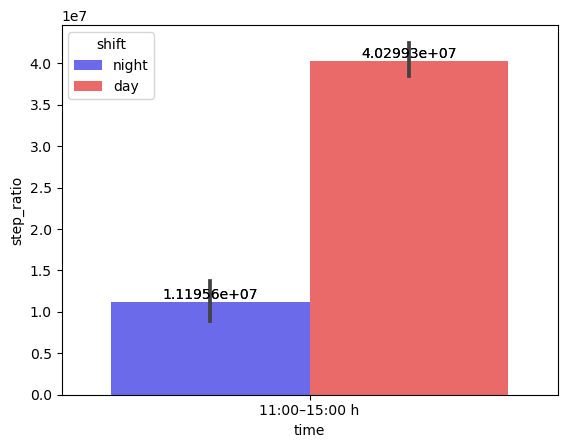


off 11:00–15:00 h 0.0002802797667866521
step_ratio
[Text(0, 0, '2.71471e+07')]
[Text(0, 0, '3.4699e+07')]


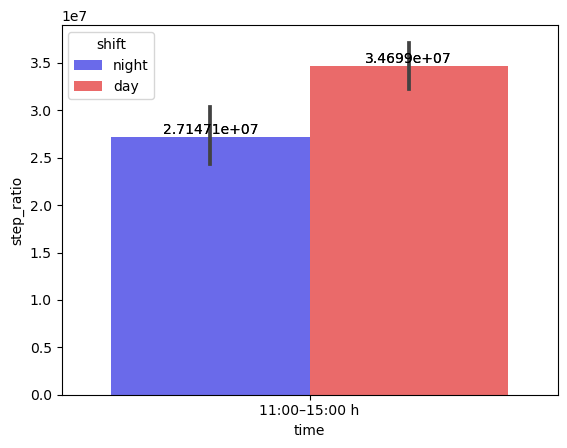



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *step_ratio* between the hours of *15:00–19:00 h* ?
work 15:00–19:00 h 5.4178971990967884e-17
step_ratio
[Text(0, 0, '2.45238e+09')]
[Text(0, 0, '4.01009e+09')]


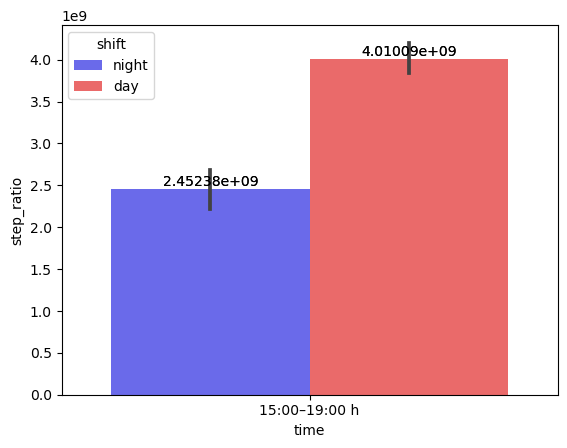


off 15:00–19:00 h 0.018316314021614332
step_ratio
[Text(0, 0, '2.84394e+09')]
[Text(0, 0, '3.30583e+09')]


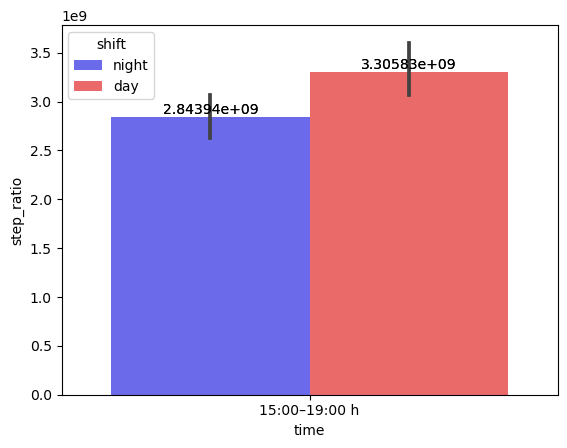



------------------------------------------

on both *work* day and *off* day, what is the effect of primarily *day-shift* nurses and primarily *night-shift* nurses on *step_ratio* between the hours of *19:00–23:00 h* ?
work 19:00–23:00 h 1.8004853317039665e-12
step_ratio
[Text(0, 0, '4.01413e+11')]
[Text(0, 0, '2.77329e+11')]


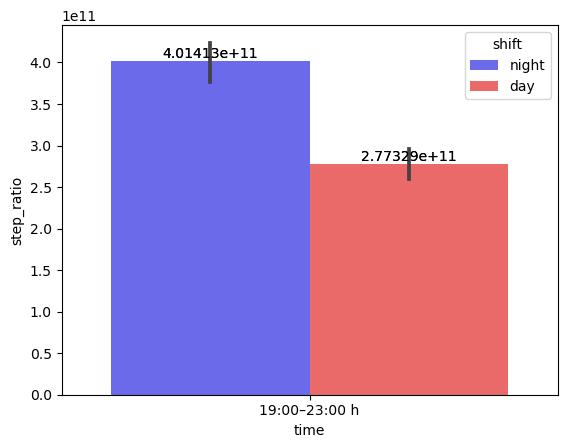


off 19:00–23:00 h 0.20571844696534003
step_ratio
[Text(0, 0, '2.79042e+11')]
[Text(0, 0, '2.53138e+11')]


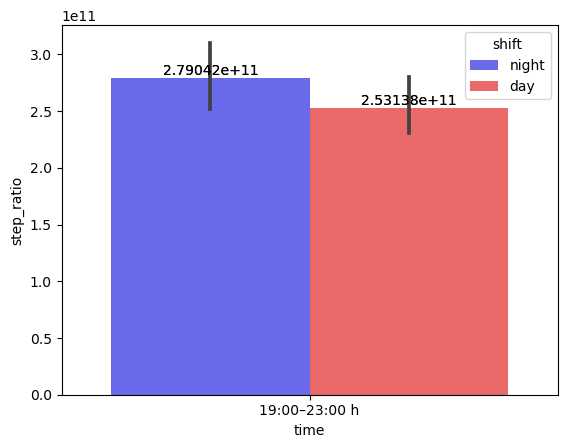



------------------------------------------



In [16]:
figure_2(figure_2_specific_questions, modified_work_df, modified_off_df)

In [41]:
# def plot_figure_2(work_df, off_df):
#     '''
#     '''
#     filter_physiologicals = ['rest', 'step_ratio']
#     fig, ax = plt.subplots()

#     # work_df = work_df.set_index(["shift"])
#     # group_by = work_df.groupby("shift")
#     # for label, group in group_by:
#     #     group.plot(x="time")
#     # print(work_df)
#     for j, col in enumerate(filter_physiologicals):
#         work_df["type"] = col
#         # print(work_df)
        
#         off_df["type"] = col
#         plot_data = [work_df, off_df]
#         for i in range(2):
#             fig, axes = plt.subplots(figsize=(12, 3), nrows=1, ncols=2)
#             print(j, col, "axes: ", type(axes), axes[i])

#             plt_df = plot_data[i].loc[plot_data[i]['type'] == col].dropna()
#             # print(plt_df, plt_df.keys())
#             # sns.lineplot(x="time", y=col, dashes=False, marker="o", hue='shift', data=plt_df, palette="seismic", ax=axes[i])
#             # sns.lineplot(x="time", y=col, hue='shift', data=plt_df)

#             # plt.close()
#             line = plt_df.plot.line(x="time", y=col)
            

In [ ]:
plot_f2 = plot_figure_2(modified_work_df, modified_off_df)
plot_f2

In [ ]:
# t = ['23:00–3:00 h', '3:00–7:00 h', '7:00–11:00 h', '11:00–15:00 h', '15:00–19:00 h', '19:00–23:00']
# # t = "12-3"
# data = [0, 25, 9, 20, 10, 33]
# shift = ["day", "night", "day", "night", "day", "night"]
# sns.lineplot(x = t, y = data, hue=shift)

# plt.show()

In [ ]:
work_df = work_df.reset_index(drop=True)
work_df

In [ ]:
work_df["type"] = "step_ratio"
work_df

In [ ]:
modified_work_df = work_df.loc[0:, ["work", "time", "step_ratio", "shift", "type"]]
modified_work_df

In [ ]:
plt_df = modified_work_df.loc[modified_work_df['type'] == "step_ratio"].dropna()
plt_df

In [ ]:
# dashes=False, marker="o", hue='shift', data=plt_df, palette="seismic"
sns.lineplot(x="time", y="step_ratio", data=plt_df, hue='shift', dashes=False, marker="o")

In [ ]:
group_by_time_work_df = modified_work_df.set_index(["time"])
work_by_time = group_by_time_work_df.loc["3rd"]
work_by_time

In [ ]:
sns.lineplot(x="time", y="step_ratio", data=plt_df, hue='shift', dashes=False, marker="o", palette="seismic")

In [ ]:
modified_work_df = work_df.loc[0:, ["work", "time", "step_ratio", "shift", "type"]]
group_by_time_work_df = modified_work_df.set_index(["time"])
work_by_time = group_by_time_work_df.loc["3rd"]
# work_by_time
sns.lineplot(x="time", y="step_ratio", data=plt_df, hue='shift', dashes=False, marker="o", palette="seismic")

In [81]:
def create_plot(work_by_time, off_by_time, r, s):
    '''
    '''
    plt_df = pd.concat([work_by_time, off_by_time])
    plt_df = plt_df.reset_index()
    print(plt_df)
    
    if r == "rest":
        p = sns.barplot(x="time", y="rest", data=plt_df, hue='shift', palette="seismic")
        print(r)
        for value in p.containers:
            p.bar_label(value,)
        plt.show()
        print()
    elif s == "step_ratio":
        p = sns.barplot(x="time", y="step_ratio", data=plt_df, hue='shift', palette="seismic")
        print(s)
        for value in p.containers:
            p.bar_label(value,)
        plt.show()
        print()
        
    
    return 

In [82]:
modified_work_df = modified_work_df.reset_index(drop=True)
modified_work_df

,work,time,rest,step_ratio,run_ratio,shift
0,work,7:00–11:00 h,0.870900,0.294175,0.236790,night
1,work,15:00–19:00 h,0.628179,0.492380,0.402107,night
2,work,19:00–23:00 h,0.901501,0.477633,0.377808,night
3,work,23:00–3:00 h,0.948894,0.374328,0.288105,night
4,work,11:00–15:00 h,0.764789,0.324393,0.271522,night
...,...,...,...,...,...,...
607,work,15:00–19:00 h,0.572392,0.268371,0.162666,day
608,work,19:00–23:00 h,0.788603,0.169805,0.098312,day
609,work,23:00–3:00 h,0.986683,0.003109,0.001196,day
610,work,11:00–15:00 h,0.610316,0.271353,0.172747,day


In [83]:
modified_work_df_step = modified_work_df.loc[0:, ["work", "time", "step_ratio", "shift"]]
modified_work_df_step

,work,time,step_ratio,shift
0,work,7:00–11:00 h,0.294175,night
1,work,15:00–19:00 h,0.492380,night
2,work,19:00–23:00 h,0.477633,night
3,work,23:00–3:00 h,0.374328,night
4,work,11:00–15:00 h,0.324393,night
...,...,...,...,...
607,work,15:00–19:00 h,0.268371,day
608,work,19:00–23:00 h,0.169805,day
609,work,23:00–3:00 h,0.003109,day
610,work,11:00–15:00 h,0.271353,day


In [84]:
modified_work_df_rest = modified_work_df.loc[0:, ["work", "time", "rest", "shift"]]
modified_work_df_rest

,work,time,rest,shift
0,work,7:00–11:00 h,0.870900,night
1,work,15:00–19:00 h,0.628179,night
2,work,19:00–23:00 h,0.901501,night
3,work,23:00–3:00 h,0.948894,night
4,work,11:00–15:00 h,0.764789,night
...,...,...,...,...
607,work,15:00–19:00 h,0.572392,day
608,work,19:00–23:00 h,0.788603,day
609,work,23:00–3:00 h,0.986683,day
610,work,11:00–15:00 h,0.610316,day


      index  work           time      rest  shift  step_ratio
0         0  work   7:00–11:00 h  0.870900  night         NaN
1         1  work  15:00–19:00 h  0.628179  night         NaN
2         2  work  19:00–23:00 h  0.901501  night         NaN
3         3  work   23:00–3:00 h  0.948894  night         NaN
4         4  work  11:00–15:00 h  0.764789  night         NaN
...     ...   ...            ...       ...    ...         ...
1219    607  work  15:00–19:00 h       NaN    day    0.268371
1220    608  work  19:00–23:00 h       NaN    day    0.169805
1221    609  work   23:00–3:00 h       NaN    day    0.003109
1222    610  work  11:00–15:00 h       NaN    day    0.271353
1223    611  work    3:00–7:00 h       NaN    day    0.066020

[1224 rows x 6 columns]
rest


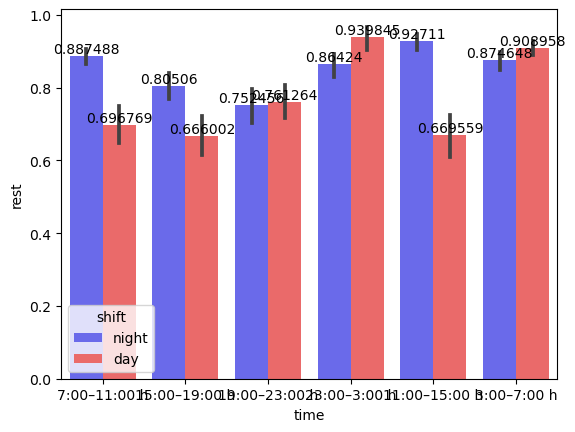

In [85]:
r = "rest"
s = "step"
create_plot(modified_work_df_rest, modified_work_df_step, r, s)


In [ ]:
create_plot